# Data analysis of Moon crater dimensions and properties

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

## Importing Robbins data
Read the associated paper [here](http://dx.doi.org/10.1029/2018JE005592). The dataset consists of the set of columns described in Appendix A on page 27.

- `CRATER_ID` — Catalog identifier string of the form `XX-X-XXXXXX`.
-` LAT_CIRC_IMG` — North latitude in decimal degrees from a circle fit.
- `LON_CIRC_IMG` — East longitude in decimal degrees from a circle fit, in the 0–360° domain.
- `LAT_ELLI_IMG` — North latitude in decimal degrees from an ellipse fit.
- `LON_ELLI_IMG` — East longitude in decimal degrees from an ellipse fit, in 0–360° domain.
- `DIAM_CIRC_IMG` — Diameter in kilometers from a circle fit.
- `DIAM_CIRC_SD_IMG` — Standard deviation of kilometers of the fit residuals. Each manual rim point’s distance from the crater center was calculated and subtracted from the best-fit radius, and this value is the standard deviation of those differences.
- `DIAM_ELLI_MAJOR_IMG` — Major axis in kilometers from an ellipse fit.
- `DIAM_ELLI_MINOR_IMG` — Minor axis in kilometers from an ellipse fit.
- `DIAM_ELLI_ECCEN_IMG` — Eccentricity (unitless) of the ellipse, calculated as $\displaystyle \sqrt{1-\frac{b^2}{a^2}}$ where a is the major and b the minor axes.
- `DIAM_ELLI_ELLIP_IMG` — Ellipticity (unitless) of the ellipse, calculated as $\displaystyle \frac{a}{b}$.
- `DIAM_ELLI_ANGLE_IMG` — Angle of the fitted ellipse in degrees, counterclockwise from the major axis oriented East-West.
- `LAT_ELLI_SD_IMG` — Formal standard error in the ellipse fit’s center latitude, in degrees.
- `LON_ELLI_SD_IMG` — Formal standard error in the ellipse fit’s center longitude, in degrees.
- `DIAM_ELLI_MAJOR_SD_IMG` — Formal standard error in the ellipse fit’s major axis, in kilometers.
- `DIAM_ELLI_MINOR_SD_IMG` — Formal standard error in the ellipse fit’s minor axis, in kilometers.
- `DIAM_ELLI_ECCEN_SD_IMG` — Formal standard error in the ellipse fit’s eccentricity (unitless). Uses the method of adding in quadrature, defined as $\displaystyle \Delta\epsilon = \sqrt{\left(\frac{b^2}{a^3}\frac{1}{\sqrt{1-b^2/a^2}}\Delta a\right)^2 + \left(-\frac{b^2}{a}\frac{1}{\sqrt{1-b^2/a^2}}\Delta b\right)^2}$.
- `DIAM_ELLI_ELLIP_SD_IMG` — Formal standard error in the ellipse fit’s ellipticity (unitless). Uses the method of adding in quadrature, defined as $\displaystyle \Delta e = \sqrt{\left(\frac{1}{b}\Delta a\right)^2 + \left(-\frac{a}{b^2}\Delta b\right)^2}$.
- `DIAM_ELLI_ANGLE_SD_IMG` — Formal standard error in the ellipse fit’s tilt angle, in degrees.
- `ARC_IMG` — An estimation of the fraction of the complete rim that was traced. See section 3.5 for more detail.
- `PTS_RIM_IMG` — Number of manual points used to identify the crater rim and calculate the circle and ellipse fits.

In [3]:
PATH_TO_ROBBINS_CSV = "~/Downloads/lunar_crater_database_robbins_2018.csv"
rb = pd.read_csv(PATH_TO_ROBBINS_CSV)

rb.head()

,CRATER_ID,LAT_CIRC_IMG,LON_CIRC_IMG,LAT_ELLI_IMG,LON_ELLI_IMG,DIAM_CIRC_IMG,DIAM_CIRC_SD_IMG,DIAM_ELLI_MAJOR_IMG,DIAM_ELLI_MINOR_IMG,DIAM_ELLI_ECCEN_IMG,...,DIAM_ELLI_ANGLE_IMG,LAT_ELLI_SD_IMG,LON_ELLI_SD_IMG,DIAM_ELLI_MAJOR_SD_IMG,DIAM_ELLI_MINOR_SD_IMG,DIAM_ELLI_ANGLE_SD_IMG,DIAM_ELLI_ECCEN_SD_IMG,DIAM_ELLI_ELLIP_SD_IMG,ARC_IMG,PTS_RIM_IMG
0,00-1-000000,-19.83040,264.7570,-19.89050,264.6650,940.960,21.31790,975.874,905.968,0.371666,...,35.9919,0.007888,0.008424,0.636750,0.560417,0.373749,0.002085,0.000968,0.568712,8088
1,00-1-000001,44.77630,328.6020,44.40830,329.0460,249.840,5.99621,289.440,245.786,0.528111,...,127.0030,0.011178,0.015101,1.052780,0.209035,0.357296,0.005100,0.004399,0.627328,2785
2,00-1-000002,57.08660,82.0995,56.90000,81.6464,599.778,21.57900,632.571,561.435,0.460721,...,149.1620,0.008464,0.019515,0.776149,0.747352,0.374057,0.003095,0.002040,0.492373,5199
3,00-1-000003,1.96124,230.6220,1.95072,230.5880,558.762,14.18190,568.529,546.378,0.276416,...,133.6910,0.007079,0.007839,0.526945,0.532872,1.262710,0.004496,0.001400,0.595221,4341
4,00-1-000004,-49.14960,266.3470,-49.18330,266.3530,654.332,17.50970,665.240,636.578,0.290365,...,87.6468,0.008827,0.017733,0.568958,0.758631,1.383530,0.004626,0.001533,0.545924,5933


## Eccentricity distribution

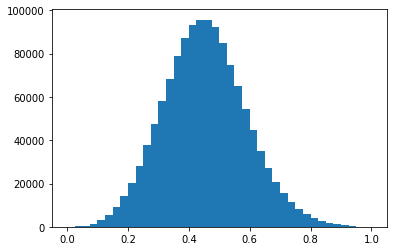

In [4]:
%matplotlib inline

eccentricities = rb["DIAM_ELLI_ECCEN_IMG"].dropna()

plt.hist(eccentricities, bins=np.linspace(0,1,41)) # bin size = 0.025
plt.show()

In [9]:
np.average(eccentricities)

0.45316375849140694

## Major axis diameter distribution (km) and circle fit diameter distribution (km)

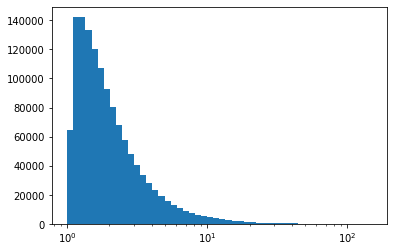

In [6]:
%matplotlib inline
major_axes = rb["DIAM_ELLI_MAJOR_IMG"].dropna()
plt.xscale("log")
plt.hist(major_axes, bins=np.exp(np.linspace(0,5,51))) # bin size = e^0.1
plt.show()

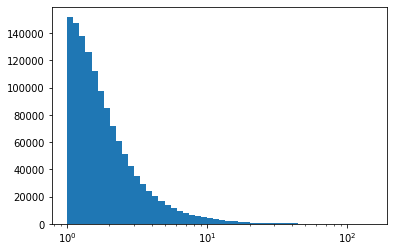

In [7]:
%matplotlib inline
circle_diameters = rb["DIAM_CIRC_IMG"].dropna()
plt.xscale("log")
plt.hist(circle_diameters, bins=np.exp(np.linspace(0,5,51))) # bin size = e^0.1
plt.show()

In [8]:
print("MAJOR_AXES:", np.average(major_axes), np.std(major_axes))
print("CIRCLE_DIAMETERS:", np.average(circle_diameters), np.std(circle_diameters))

MAJOR_AXES: 2.6046947061093895 5.787464222230638
CIRCLE_DIAMETERS: 2.436963377709368 5.519131133582032


## Importing Salamunićcar data

In [24]:
PATH_TO_SALAMUNICCAR_XLSX = "~/Downloads/GoranSalamuniccar_MoonCraters/LU78287GT.xlsx"
sm = pd.read_excel(PATH_TO_SALAMUNICCAR_XLSX, "LU60645GT")

sm.head()

,gt_name_id,x,y,r,D[km],D[range],p,name,idxs(LU_LASGW),idxs(LU_CLEMBASE_FIXED),idxs(LU_LOM),"depth/diameter (1/128°LOLA, quad_precision=1)","depth/diameter (1/256°LOLA, quad_precision=1)","depth/diameter (1/512°LOLA, quad_precision=1)"
0,S000001N06902R00074H04373Y2010S,-155.40000,85.200000,2.918543,177.000,14,1,Rozhdestvenskiy r: Рождественский,"0,0","0,0","0,0",0.014770,0.014798,0.014791
1,S000002N03521R00435H04374Y2010S,-93.37462,86.133947,1.792975,108.738,13,1,Hermite r: Эрмит,"0,0","0,0","0,0",0.016103,0.016170,0.016143
2,S000003N05932R00694H04377Y2010S,33.00000,88.600000,1.203693,73.000,12,1,Peary r: Пири,"0,0","0,0","0,0",0.009003,0.009110,0.009084
3,S000004N01217R00434H04385Y2010S,9.80000,85.300000,1.533472,93.000,13,1,Byrd r: Бэрд,"0,0","0,0","0,0",0.007721,0.007613,0.007688
4,S000005N05499R00156H04415Y2010S,95.59174,81.052616,1.777350,107.790,13,1,Nansen r: Нансен,"0,0","0,0","0,0",0.024764,0.024977,0.024985


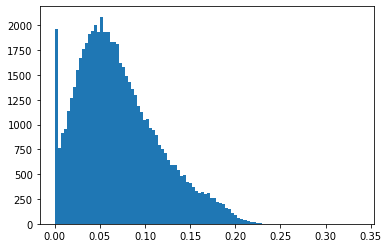

In [28]:
plt.hist(sm["depth/diameter (1/512°LOLA, quad_precision=1)"], bins=100)
plt.show()

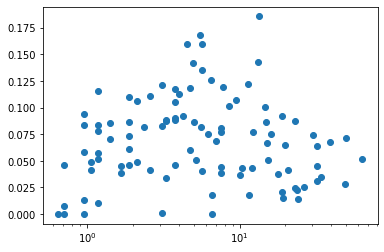

In [43]:
# Randomly sample 100 craters and plot dep/diam over D

combined = list(zip(sm["D[km]"], sm["depth/diameter (1/512°LOLA, quad_precision=1)"]))
combined_sample = random.sample(combined, 100)
graph_x, graph_y = np.array(combined_sample)[:,0], np.array(combined_sample)[:,1]

plt.xscale("log")
plt.scatter(graph_x, graph_y)
plt.show()

In [60]:
# bin data rows by diameter (100 bins with size 10)
bins = {x: [] for x in range(0,2100,10)}
for index, row in sm.iterrows():
    bins[round(row["D[km]"]/10)*10].append(row["depth/diameter (1/512°LOLA, quad_precision=1)"])
    
for index in bins.keys():
    bins[index] = np.average(bins[index])

graph_x, graph_y = zip(*list(bins.items()))

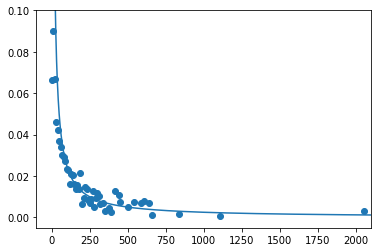

In [65]:
# Note that depth tends to be constant.
plt.scatter(graph_x, graph_y)
plt.axis((-100,2100,-0.005,0.1))
plt.plot([x for x in range(1,2100)], [2.5/x for x in range(1,2100)])
plt.show()

/Users/bracho/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


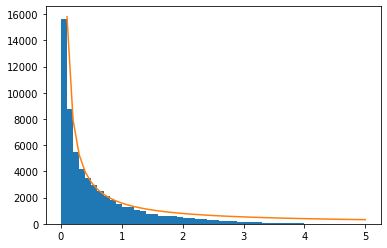

In [88]:
# d/D * D
depth = sm["depth/diameter (1/512°LOLA, quad_precision=1)"] * sm["D[km]"]
plt.hist(depth, bins=np.linspace(0,5,51))
plt.plot(np.linspace(0,5,51), [15800/(x*10) for x in np.linspace(0,5,51)]) # Zipfian distribution
plt.show()

In [89]:
np.median(depth)

0.308067494977272